<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Handout9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #9 : The Influence of Individual Observations

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Used Cars - Ford Focus Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Car Type: Ford Focus</li>
        <li>Response Variable: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Miles; (data includes only cars with Miles > 5,000)</li>
          <li>Age; Years old</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1U4anANNmtMFMg9iLM_P5Lp_f39qGCZiZ" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Read in the data

In [2]:
#@title Read in Data

# Reading data in using read_csv 
FordFocus <- read_csv("http://www.StatsClass.org/stat360/Datasets/UsedCars_FordFocus.csv")

Rows: 67 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Make:Model
dbl (3): Price, Miles, Age


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



View the first few rows of the data.frame.

In [3]:
#@title View the first few rows of data
head(FordFocus)
dim(FordFocus)

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,15998,7909,-2
Ford Focus,9999,11946,-5
Ford Focus,12998,12499,-3
Ford Focus,12998,12499,-3
Ford Focus,12445,13912,-1
Ford Focus,9999,14000,-5


[1] 67  4

The following snip-it of code can be used to remove all na values from a data.frame.

In [4]:
#@title Removing the NA from the data.frame
FordFocus <- (
              FordFocus
                %>% drop_na()
             )

head(FordFocus)
dim(FordFocus)

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,15998,7909,-2
Ford Focus,9999,11946,-5
Ford Focus,12998,12499,-3
Ford Focus,12998,12499,-3
Ford Focus,12445,13912,-1
Ford Focus,9999,14000,-5


[1] 65  4

## Setup for Model #1, i.e. Price ~ Miles

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Miles</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles) = \sigma^{2}$</li>
</ul></ul>

## Setup for Model #2, i.e. Price ~ Age

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Age</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Age) = \gamma_{0} + \gamma_{1} * Age$</li>
  <li>$Var(Price | Age) = \delta^{2}$</li>
</ul></ul>

## Model #1 Output

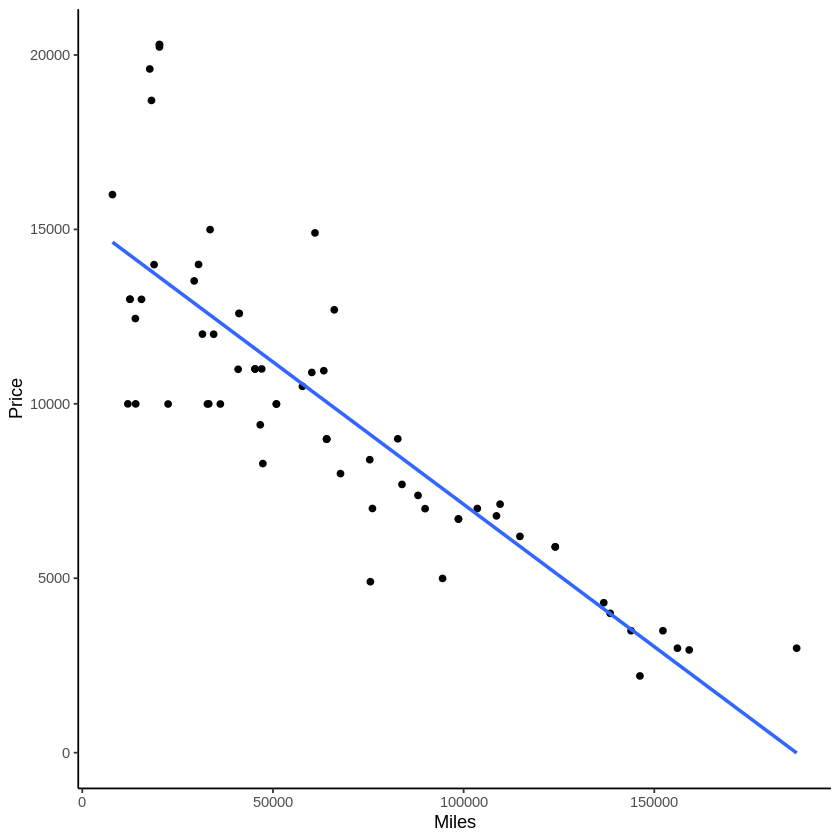

In [5]:
#@title Scatterplot with simple linear regression line
ggplot(data=FordFocus, aes(x=Miles,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

In [6]:
#@title Fitting Model #1
FordFocus_Model1 <- lm(Price ~ Miles, data=FordFocus)

In [7]:
#@title Getting a summary of the model
summary(FordFocus_Model1)


Call:
lm(formula = Price ~ Miles, data = FordFocus)

Residuals:
    Min      1Q  Median      3Q     Max 
-4306.7 -1131.3  -473.9   666.8  6669.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.528e+04  5.398e+02   28.31   <2e-16 ***
Miles       -8.162e-02  6.788e-03  -12.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2440 on 63 degrees of freedom
Multiple R-squared:  0.6965,	Adjusted R-squared:  0.6917 
F-statistic: 144.6 on 1 and 63 DF,  p-value: < 2.2e-16


## Model #2 Output

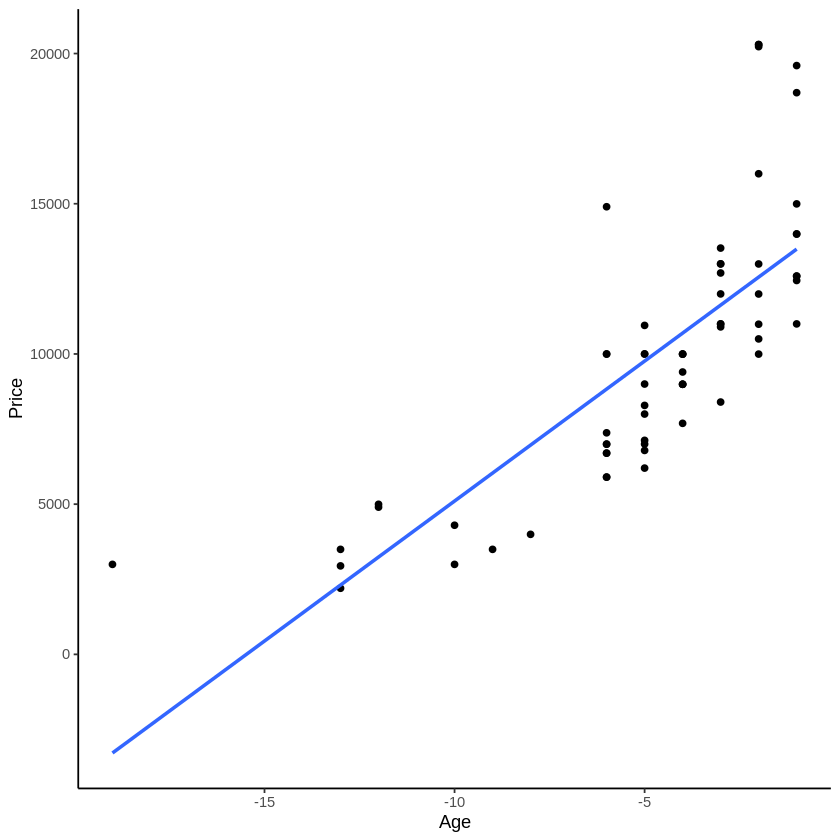

In [8]:
#@title Scatterplot with simple linear regression line
ggplot(data=FordFocus, aes(x=Age,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

In [9]:
#@title Fitting Model #2
FordFocus_Model2 <- lm(Price ~ Age, data=FordFocus)

In [10]:
#@title Getting a summary of the model
summary(FordFocus_Model2)


Call:
lm(formula = Price ~ Age, data = FordFocus)

Residuals:
    Min      1Q  Median      3Q     Max 
-3562.4 -1835.6  -699.2  1169.4  7741.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14421.6      591.1  24.396  < 2e-16 ***
Age            931.8       98.0   9.508 8.62e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2838 on 63 degrees of freedom
Multiple R-squared:  0.5893,	Adjusted R-squared:  0.5828 
F-statistic: 90.41 on 1 and 63 DF,  p-value: 8.623e-14


### Removing Age = -19 from consideration

In [11]:
FordFocus[c(65), ]

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,2995,187334,-19


To remove this row from consideration, simply use the following syntax.

In [12]:
#@title Fitting Model #2b
FordFocus_Model2_without_row65 <- lm(Price ~ Age, data=FordFocus[-c(65), ])

In [13]:
summary(FordFocus_Model2_without_row65)


Call:
lm(formula = Price ~ Age, data = FordFocus[-c(65), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3411.0 -1726.3  -759.9  1239.1  7466.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14980.8      601.2  24.918  < 2e-16 ***
Age           1074.0      107.4   9.996 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2707 on 62 degrees of freedom
Multiple R-squared:  0.6171,	Adjusted R-squared:  0.6109 
F-statistic: 99.92 on 1 and 62 DF,  p-value: 1.516e-14


## The Concept of Leverage

The Hat matrix is defined as follows

$$
\bf{H} = \bf{X}(\bf{X}^{'}\bf{X})^{-1} \bf{X}^{'}
$$

The following steps can be followed to obtain the $h_{i}$ values for each observation.

In [15]:
#@title Setting up the X matrix
x0 <- rep(1,65)
x1 <- FordFocus$Age

#Create the matrix
X <- cbind(x0,x1)

In [16]:
#@title Getting Hat matrix
#First, create XpX
XpX <- t(X) %*% X

#Next, getting its inverse
XpXInv <- solve(XpX,diag(2))

#Next, computing the H matrix
H <- X %*% XpXInv %*% t(X)

#Getting the diagonal elements of the Hat matrix
diag(H)


[1] 0.02504587 0.01541284 0.01944954 0.01944954 0.03302752 0.01541284
 [7] 0.02504587 0.03302752 0.03302752 0.03302752 0.02504587 0.02504587
[13] 0.02504587 0.02504587 0.01944954 0.03302752 0.01944954 0.01697248
[19] 0.01697248 0.03302752 0.02504587 0.01623853 0.02504587 0.03302752
[25] 0.03302752 0.01944954 0.01944954 0.01623853 0.03302752 0.01541284
[31] 0.01623853 0.01623853 0.02504587 0.01944954 0.01697248 0.01541284
[37] 0.01623853 0.01623853 0.01623853 0.01944954 0.01541284 0.01944954
[43] 0.07642202 0.01541284 0.01541284 0.01623853 0.01697248 0.01697248
[49] 0.07642202 0.01697248 0.01697248 0.01697248 0.01541284 0.01541284
[55] 0.01541284 0.01697248 0.01697248 0.04706422 0.02724771 0.09467890
[61] 0.09467890 0.03596330 0.04706422 0.09467890 0.25431193

The hat values for each observations can be obtained using the hatvalues() function in R.  The hatvalues() function will return $h_{i}$ for each observations.

In [ ]:
#@title Getting the hat values for Price ~ Age, i.e. Model2
hatvalues(FordFocus_Model2)

1          2          3          4          5          6          7 
0.02504587 0.01541284 0.01944954 0.01944954 0.03302752 0.01541284 0.02504587 
         8          9         10         11         12         13         14 
0.03302752 0.03302752 0.03302752 0.02504587 0.02504587 0.02504587 0.02504587 
        15         16         17         18         19         20         21 
0.01944954 0.03302752 0.01944954 0.01697248 0.01697248 0.03302752 0.02504587 
        22         23         24         25         26         27         28 
0.01623853 0.02504587 0.03302752 0.03302752 0.01944954 0.01944954 0.01623853 
        29         30         31         32         33         34         35 
0.03302752 0.01541284 0.01623853 0.01623853 0.02504587 0.01944954 0.01697248 
        36         37         38         39         40         41         42 
0.01541284 0.01623853 0.01623853 0.01623853 0.01944954 0.01541284 0.01944954 
        43         44         45         46         47         48         49 
0.07642202 0.01541284 0.01541284 0.01623853 0.01697248 0.01697248 0.07642202 
        50         51         52         53         54         55         56 
0.01697248 0.01697248 0.01697248 0.01541284 0.01541284 0.01541284 0.01697248 
        57         58         59         60         61         62         63 
0.01697248 0.04706422 0.02724771 0.09467890 0.09467890 0.03596330 0.04706422 
        64         65 
0.09467890 0.25431193

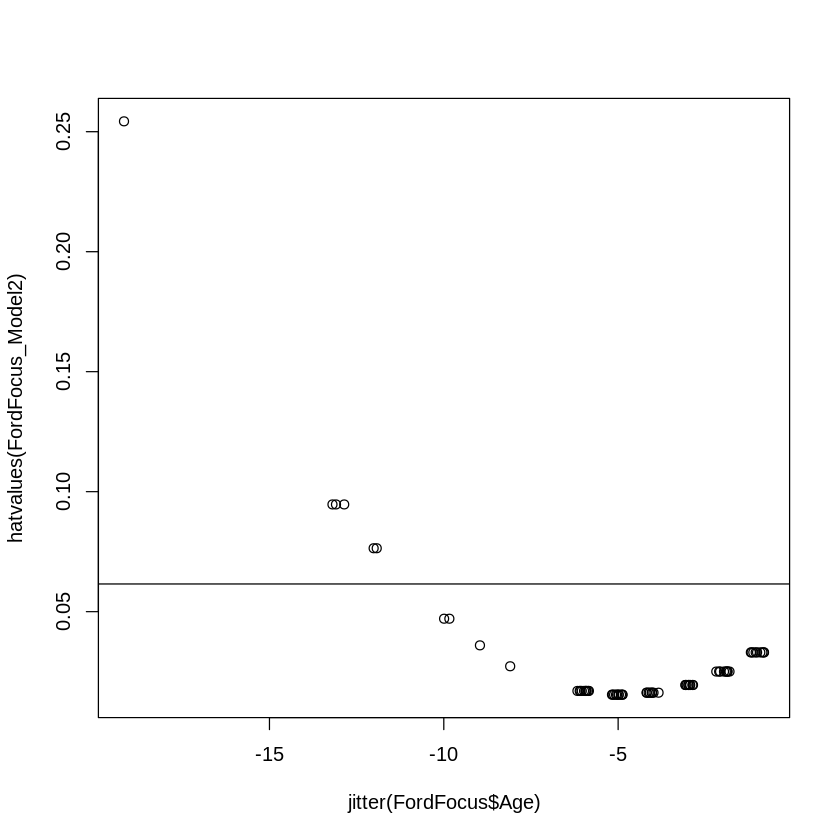

In [17]:
#@title Creating a plot of the hat values
plot(jitter(FordFocus$Age), hatvalues(FordFocus_Model2) )  # add some jitter to Age
#adding a reference line at 2 * (#parameters / n)
abline(h=4/65)

Create a new vector that contains all the observations that have high leverage.

In [18]:
highleverage <- which(hatvalues(FordFocus_Model2) > 4/65)

Next, get the rows from the orginal data.frame that correspond to the observations with high leverage.

In [19]:
FordFocus[highleverage,]

Make:Model,Price,Miles,Age
<chr>,<dbl>,<dbl>,<dbl>
Ford Focus,4900,75552,-12
Ford Focus,4995,94476,-12
Ford Focus,3495,143904,-13
Ford Focus,2200,146235,-13
Ford Focus,2945,159165,-13
Ford Focus,2995,187334,-19


The orginal scatterplot with the high leverage points identified on the scatterplot.

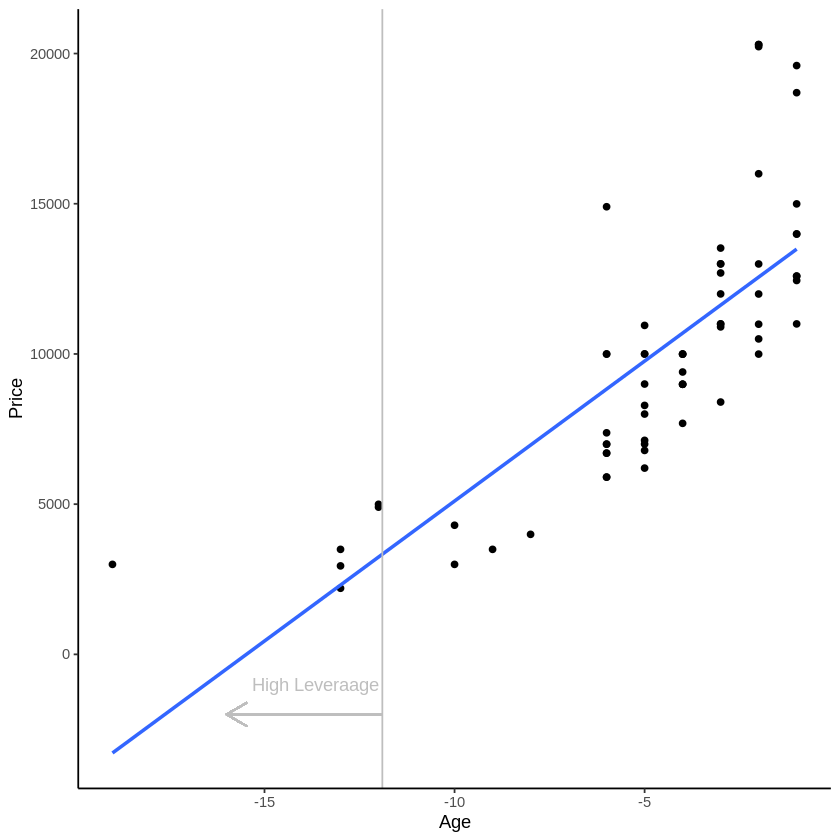

In [20]:
#@title Scatterplot showing the location of the observations with high leverage
ggplot(data=FordFocus, aes(x=Age,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  geom_vline(xintercept=-11.9, color='gray') +
  geom_segment(aes(x = -11.9, y = -2000, xend = -16, yend = -2000),
                  arrow = arrow(length = unit(0.5, "cm")),color='gray') + 
  annotate(geom="text", x=-12, y=-1000, hjust=1, label="High Leveraage",
              color='gray') + 
  theme_classic()

## DFBETA Algorithm

Step 1: Create an empty data.frame to hold the outcomes from the algorithm

In [21]:
DFBETA_Outcomes <-data.frame(rowid=numeric(), yintercept = numeric(), slope = numeric(), rmse = numeric())

Step 2: Fit a model -- removing one observation at a time, put outcomes into  data.frame

In [22]:
for(i in 1:65){
  model_i <- lm(Price ~ Age, data=FordFocus[-c(i), ])
  DFBETA_Outcomes[i,1] <- i
  DFBETA_Outcomes[i,2] <- model_i$coefficients[1]
  DFBETA_Outcomes[i,3] <- model_i$coefficients[2]
  DFBETA_Outcomes[i,4] <- sigma(model_i)
}

Step 3: Compute the change in y-intercept and slope for each observation removed

In [23]:
DFBETA_Outcomes <- (DFBETA_Outcomes
                      %>% mutate(
                                  DFBeta_yint = (14421.6 - yintercept),
                                  DFBeta_slope = (931.8 - slope)
                                )
                   )

Step 4: Sort by the most change in the slope (or yintercept)

In [24]:
 (DFBETA_Outcomes
   %>% arrange(desc(abs(DFBeta_slope)))
   %>% head()
 )

,rowid,yintercept,slope,rmse,DFBeta_yint,DFBeta_slope
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,14980.85,1073.9707,2707.428,-559.2487,-142.17067
2,8,14183.96,902.8605,2749.587,237.6436,28.93947
3,12,14168.84,904.8896,2681.682,252.7647,26.91036
4,13,14168.84,904.8896,2681.682,252.7647,26.91036
5,11,14171.12,905.1334,2685.008,250.4790,26.66664
6,9,14219.04,907.1395,2780.375,202.5564,24.66053


Creating an index plot for the Change in Slope

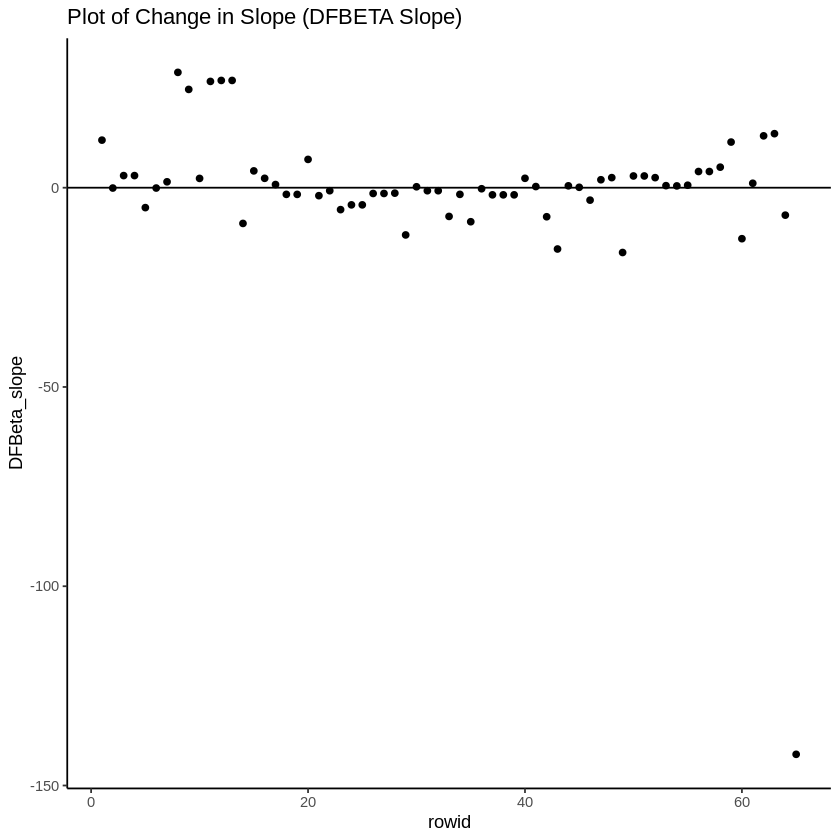

In [26]:
ggplot(data=DFBETA_Outcomes, aes(x=rowid,y=DFBeta_slope)) + 
  geom_point() + 
  ggtitle("Plot of Change in Slope (DFBETA Slope)") + 
  geom_hline(yintercept=0) +
  theme_classic()

### Using the CAR package to more easily create DFBeta Plot

In [27]:
#@title Load car package
#load car package
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




From the car() package, use the dfbetaPlots() function to create the same plot created above.

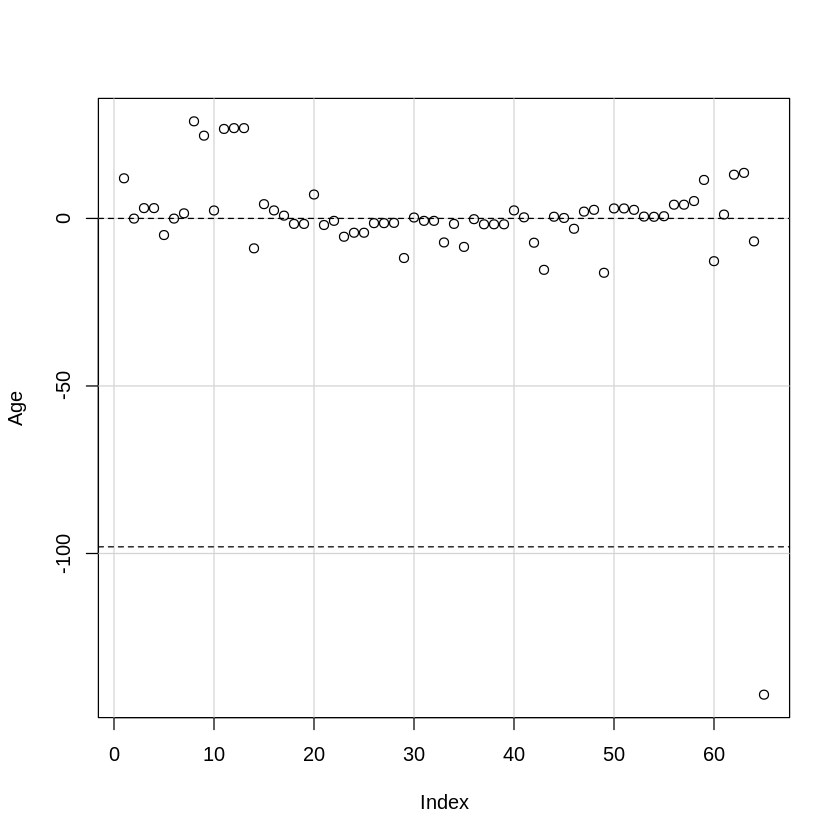

In [28]:
dfbetaPlots(FordFocus_Model2)

The car() package also has the influenceIndexPlot() function that can be used to investigate the influence of each observation on the regression model.  Here, the variable being plotted is the <i>hat</i> values.

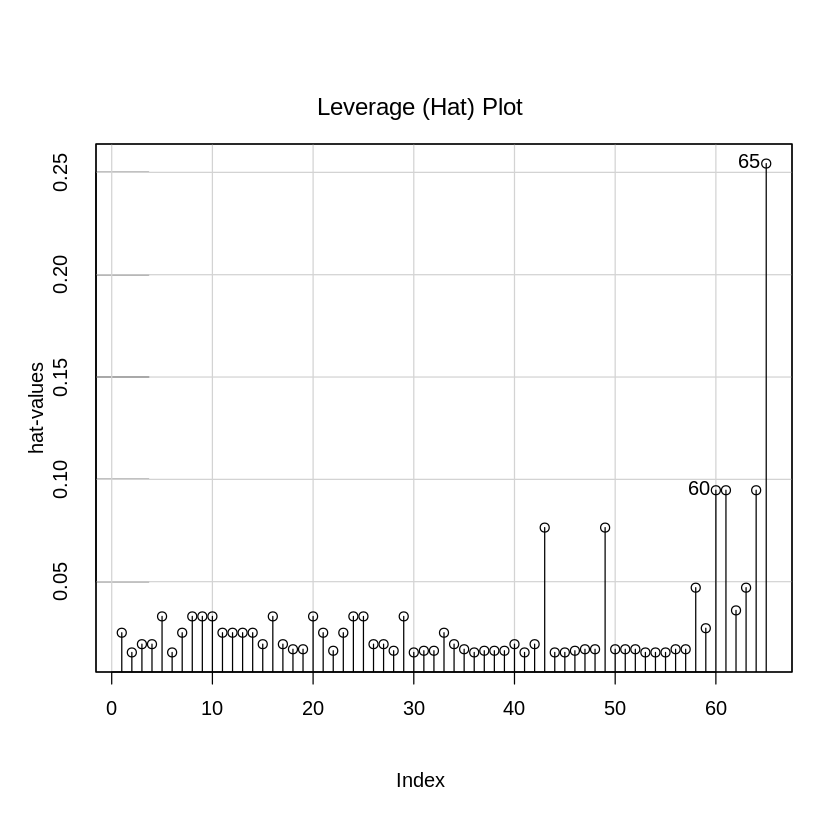

In [29]:
influenceIndexPlot(FordFocus_Model2, vars=c("hat"), grid=TRUE, main="Leverage (Hat) Plot")

## Getting the Standardized Residuals

The standardized residuals are computed as follows.  This type of residual is sometimes called an <i>internally</i> studentized residual.
$$
\mbox{Standardized Residual} = \frac{\hat{e}_{i} - 0}{\sqrt{\hat{\sigma}^{2}(1-h_{ii})}}
$$

In [30]:
#@title Getting the standardized residuals
rstandard(FordFocus_Model1)

1            2            3            4            5            6 
 0.570580870 -1.799781917 -0.527490736 -0.527490736 -0.709928787 -1.728211911 
           7            8            9           10           11           12 
-0.425292449  2.402585963  2.041082265  0.102503677  2.748928354  2.778085255 
          13           14           15           16           17           18 
 2.778085255 -1.435549042  0.264963020  0.499142764 -0.295100246 -1.082034415 
          19           20           21           22           23           24 
-1.067942231  1.016170025 -0.196535316 -0.966322742 -0.395381623  0.276131821 
          25           26           27           28           29           30 
 0.276131821 -0.241726983 -0.241726983 -0.857239693 -0.182160410 -1.294356023 
          31           32           33           34           35           36 
-0.467744997 -0.467744997 -0.028164883  0.219651722  1.900438603  0.346294720 
          37           38           39           40           41           42 
-0.438319119 -0.438319119 -0.438319119  1.159775159 -0.725080886 -0.301224769 
          43           44           45           46           47           48 
-1.741550290 -0.855632578  0.194202824 -0.309559277 -0.298225075 -0.392571007 
          49           50           51           52           53           54 
-1.067039465 -0.220548194 -0.220548194  0.071933224  0.154672644  0.327196161 
          55           56           57           58           59           60 
 0.119410393  0.311076661  0.311076661  0.075194922  0.005313251 -0.017095741 
          61           62           63           64           65 
-0.485551789  0.273304748  0.193080695  0.280439044  1.320051900

Next, getting a plot of the standardized residuals for all observations.

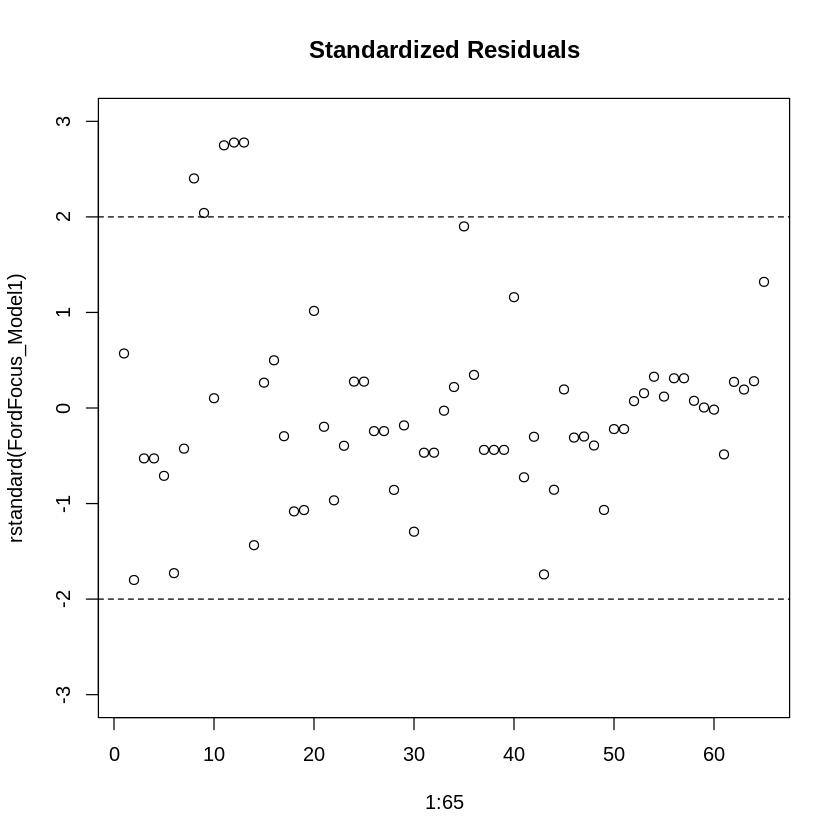

In [31]:
plot(1:65,rstandard(FordFocus_Model1), main="Standardized Residuals",ylim=c(-3,3))
abline(h=c(-2,2),lty=2)

### Standardized Residuals via Brute Force

In [32]:
FordFocus_StandardizedResiduals <- (FordFocus
                                      %>% select(Price, Miles)
                                      %>% mutate(Predicted_Price = predict(FordFocus_Model1, newdata=FordFocus))
                                      %>% mutate(Residual = (Price - Predicted_Price))
                                      %>% mutate(hii = hatvalues(FordFocus_Model1))
                                      %>% mutate(Standardized_Resids = Residual / sqrt(2440^2 * (1-hii)))
                                   )
#Next, show only the outliers
(FordFocus_StandardizedResiduals
      %>% mutate(rowid = 1:65)
      %>% filter(abs(Standardized_Resids) > 2)
)

Price,Miles,Predicted_Price,Residual,hii,Standardized_Resids,rowid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
19599,17696,13836.35,5762.652,0.03333964,2.402125,8
18697,18134,13800.60,4896.401,0.03301452,2.040691,9
20229,20232,13629.36,6599.638,0.03149840,2.748401,11
20299,20232,13629.36,6669.638,0.03149840,2.777552,12
20299,20232,13629.36,6669.638,0.03149840,2.777552,13


The following code can be used to identify the observations in the original data.frame that are outliers.

In [33]:
outliers <- which( abs( rstandard(FordFocus_Model1))  > 2)

In [34]:
( FordFocus
      %>% select(Price, Miles)
      %>% slice(outliers)
)

Price,Miles
<dbl>,<dbl>
19599,17696
18697,18134
20229,20232
20299,20232
20299,20232


### Getting the Studentized residuals

The <i>externally</i> studentized residuals are computed as follows.  Here, the error term is estimated excluding the $i^{th}$ observation.
$$
\mbox{Externally Studentized Residual} = \frac{\hat{e}_{i} - 0}{\sqrt{\hat{\sigma}^{2}_{(-i)}(1-h_{ii})}}
$$

In [35]:
#@title Getting the studentized residuals
rstudent(FordFocus_Model1)

1            2            3            4            5            6 
 0.567502566 -1.833190432 -0.524446976 -0.524446976 -0.707105991 -1.756584895 
           7            8            9           10           11           12 
-0.422510562  2.500760419  2.095280773  0.101695382  2.906928607  2.942040107 
          13           14           15           16           17           18 
 2.942040107 -1.447989818  0.262998307  0.496147487 -0.292951354 -1.083527903 
          19           20           21           22           23           24 
-1.069154344  1.016437297 -0.195029070 -0.965807104 -0.392718665  0.274097452 
          25           26           27           28           29           30 
 0.274097452 -0.239912125 -0.239912125 -0.855412578 -0.180756518 -1.301463765 
          31           32           33           34           35           36 
-0.464825707 -0.464825707 -0.027940634  0.217984966  1.941775961  0.343862782 
          37           38           39           40           41           42 
-0.435491020 -0.435491020 -0.435491020  1.163016222 -0.722323508 -0.299039959 
          43           44           45           46           47           48 
-1.770825202 -0.853790015  0.192713059 -0.307326450 -0.296057791 -0.389920109 
          49           50           51           52           53           54 
-1.068233912 -0.218875321 -0.218875321  0.071362973  0.153469315  0.324865121 
          55           56           57           58           59           60 
 0.118472308  0.308835201  0.308835201  0.074599098  0.005270915 -0.016959557 
          61           62           63           64           65 
-0.482586610  0.271287859  0.191598876  0.278378245  1.328028356

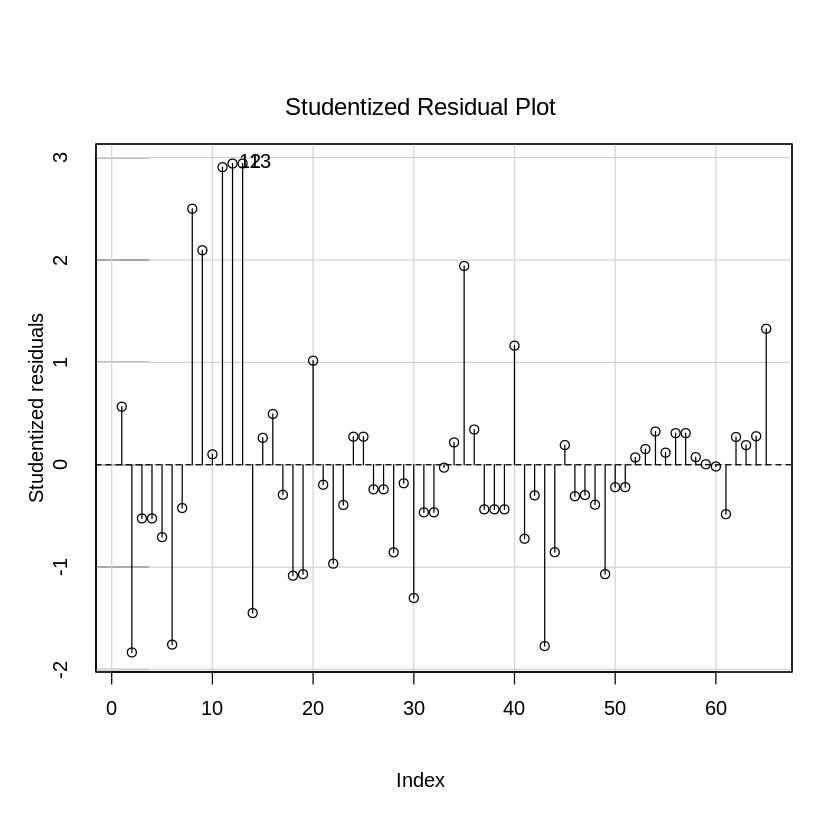

In [39]:
influenceIndexPlot(FordFocus_Model1, vars=c("Studentized"), grid=TRUE, main="Studentized Residual Plot")

Getting a list of observatios whose studentized residuals are greater than 2 or less than -2.

In [37]:
which( abs(rstudent(FordFocus_Model1)) > 2)

8  9 11 12 13 
 8  9 11 12 13

### Cook's Distance

Cook's Distance is diagnostic measure of inflence that combines the concepts of leverage and being an outlier.

$$
\mbox{Cook's Distance}_i = \underbrace{\frac{(\mbox{Standardized Residual}_i)^2}{(k+1)}}_{residual} * \underbrace{\frac{h_i}{(1-h_i)}}_{leverage}
$$

In [41]:
#@title Getting Cooks Distance
cooks.distance(FordFocus_Model1)

1            2            3            4            5            6 
7.026496e-03 6.377186e-02 5.408975e-03 5.408975e-03 9.484582e-03 5.609230e-02 
           7            8            9           10           11           12 
3.280211e-03 9.954396e-02 7.111744e-02 1.765090e-04 1.228811e-01 1.255016e-01 
          13           14           15           16           17           18 
1.255016e-01 3.179808e-02 9.261835e-04 3.203397e-03 1.094367e-03 1.429650e-02 
          19           20           21           22           23           24 
1.381934e-02 1.241514e-02 4.550576e-04 1.059663e-02 1.612780e-03 7.827868e-04 
          25           26           27           28           29           30 
7.827868e-04 5.553742e-04 5.553742e-04 6.823514e-03 3.062061e-04 1.538536e-02 
          31           32           33           34           35           36 
1.904955e-03 1.904955e-03 6.406085e-06 3.831189e-04 2.855275e-02 9.399255e-04 
          37           38           39           40           41           42 
1.503396e-03 1.503396e-03 1.503396e-03 1.050869e-02 4.114602e-03 7.418069e-04 
          43           44           45           46           47           48 
2.483518e-02 6.026072e-03 3.376266e-04 8.726337e-04 8.701975e-04 1.561434e-03 
          49           50           51           52           53           54 
1.264363e-02 5.905914e-04 5.905914e-04 7.017786e-05 3.640525e-04 1.665671e-03 
          55           56           57           58           59           60 
2.502121e-04 2.099711e-03 2.099711e-03 1.623073e-04 8.398928e-07 9.750027e-06 
          61           62           63           64           65 
8.249727e-03 2.949362e-03 1.585465e-03 3.549587e-03 1.297711e-01

Getting a list of observations whose Cook's Distance is greater than $\frac{4}{n}$

In [42]:
which( cooks.distance(FordFocus_Model1) > 4/65)

2  8  9 11 12 13 65 
 2  8  9 11 12 13 65

Getting a plot of Cook's Distance..

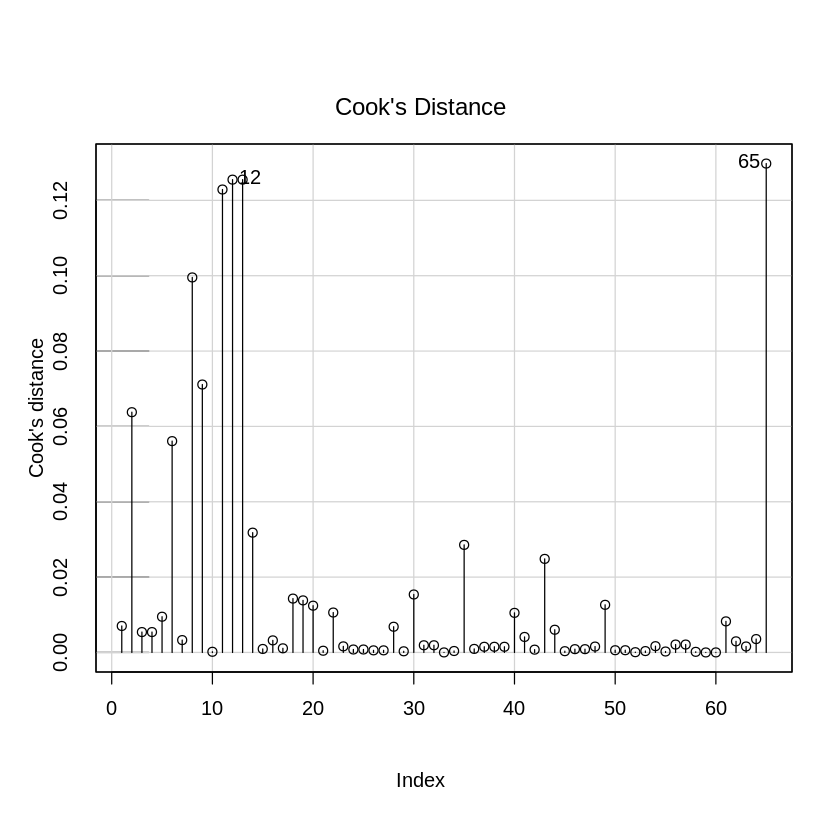

In [40]:
influenceIndexPlot(FordFocus_Model1, vars=c("Cook"), grid=TRUE, main="Cook's Distance")

Finally, the influencePlot() from the car package will allow you to look at leverage, studentized residuals, and Cooks Distance all at once.

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
12,2.9420401,0.0314984,0.125501628
13,2.9420401,0.0314984,0.125501628
64,0.2783782,0.0827938,0.003549587
65,1.3280284,0.1296363,0.129771074


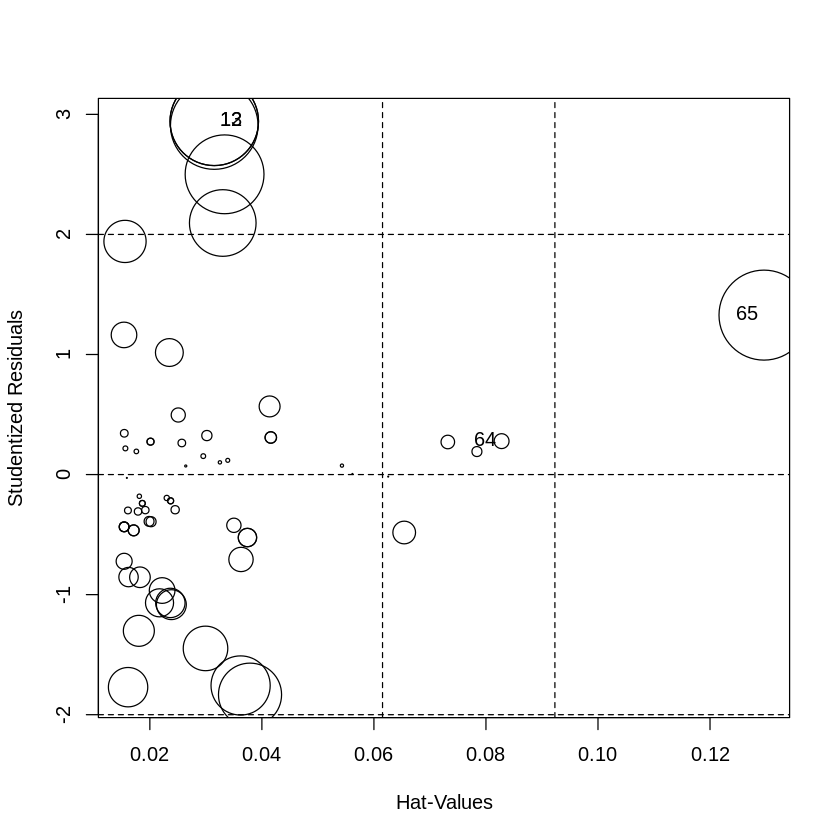

In [43]:
influencePlot(FordFocus_Model1)

End of Document